# Music Classification using Machine Learning models

To create a model that predicts music genres with a simple pipeline, we resorted to literature to find what are the best technologies used today to solve this problem. Given the time allotted for this project and the challenge of understanding the connection between music genres, the project was developed with the goal of reproducing the results obtained by previous researchers and thus perform the analysis of the results found. In this notebook are the codes and results found when developing the k-Nearest Neighbors model. A second notebook is used to describe the Deep Neural Network ResNet50.

## Part 01 - Music Classification using kNN (k-Nearest Neighbors)

In the first part of the project, based on the research of N. Ndou et al. "Music Genre Classification: A Review of Deep-Learning and Traditional Machine-Learning Approaches" [1], the kNN model was chosen to be developed due to the results obtained on the same dataset used in this project (GTZAN).

### Preprocessing

As pointed out in the research, the 3 seconds samples presented significantly better accuracy in predicting the model. Since this is a large volume of data, the Numpy library was used to handle it. The information available in the CSV file was separated in three variables:

- header - containing the names of each measured feature
- labels - containing the musical genre of each analyzed track
- data - with all the collected data.

In [1]:
import csv
import numpy as np
import pandas as pd
import sklearn.preprocessing as sk

#DATA | Receive and create numpy array
with open('features_3_sec.csv') as csv_file:
	csv_reader = csv.reader(csv_file)
	reader_list = list(csv_reader)

dataset = np.array(reader_list)
header = dataset[0, :]
data = dataset[1:,:]

#DATA | Create labels
labels = dataset[1:, 59]
encoder = sk.LabelEncoder()
labels = encoder.fit_transform(labels)

Also based on the article, the features 'Spectral Crest Factor', 'Spectral Tonal Power Ratio' and 'Chroma' were removed from the analysis. The data was then normalized using the MinMaxScaler method from the Sklearn library and separated into training and test sets, in a 75:25 ratio, respectively.

In [2]:
import sklearn.model_selection as skm

#DATA | Features selection
#Remove features which index is 0, 1, 16, 17, 59
data = np.delete(data, [0, 1, 16, 17, 59], 1)
header = np.delete(header, [0, 1, 16, 17, 59])

#DATA | Feature scailing - min-max scaler
scaler = sk.MinMaxScaler()
data = scaler.fit_transform(data)

#DATA | Split test and training sets
x_train, x_test, y_train, y_test = skm.train_test_split(data, labels, random_state = 48, stratify = labels, test_size = 0.25)

### Machine Learning Model

For the creation of the kNN model, a value of 1 was chosen for the parameter 'n_neighbors', following the recommendation of the article. In the case of a project whose objective is to understand the impact of the parameters in obtaining the best prediction model, we would use cross validation to understand the variation that occurs with each change. 

When testing the model with the test set we see that the accuracy presents a relevant value in the prediction of music genres.

In [3]:
import sklearn.neighbors as skn
import sklearn.metrics as skme

#kNN | Training
knn = skn.KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

#kNN | Testing
predict = knn.predict(x_test)
print('Accuracy:', skme.accuracy_score(y_test, predict))

Accuracy: 0.923138510808647


### Evaluation

Using the Confusion Matrix to evaluate the results obtained, we notice the high accuracy of the model. However, we see that the largest number of errors occurred in the pairs 'Jazz x Classical' and 'Rock x Disco', so we will take a closer look at how these two genres are connected.

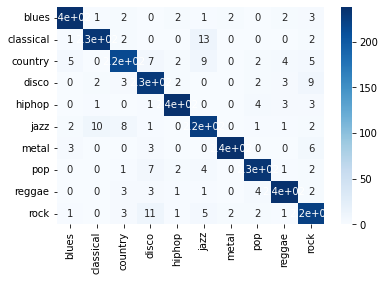

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def confusionMatrix(y_test, predict):
	confusionMatrix = skme.confusion_matrix(y_test, predict)
	sns.heatmap(confusionMatrix, cmap="Blues", annot=True, 
		xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
		yticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
	plt.show()

confusionMatrix(y_test, predict)

To generate visual information that helps us demonstrate how these music genres relate to each other, we generate graphs that compare two features with the conflicting genres. To do so, we can choose two of them among all the features used in the model by informing their index, respectively. From some experiments we can observe that the data tends to line up in a diagonal line, separated exactly in the middle and with some sporadic points outside the line. However, when using 'tempo' as one of the variables, we can see a different distribution that is also separated in the middle but with some small intersections, which can cause the noise that generates the errors in the prediction.

In [5]:
def plotData2DGenre(data, labels, genre1, genre2, param1 = None, param2 = None, header = None):

	#Transform labels in list of lists
	labels = labels.reshape(labels.shape[0], 1)

	x1 = data[:, param1]
	x1 = x1.reshape(x1.shape[0], 1)

	x2 = data[:, param2]
	x2 = x2.reshape(x2.shape[0], 1)

	LabeledData = np.append(x1, x2, axis = 1)
	LabeledData = np.append(LabeledData, labels, axis = 1)

	LabeledData1 = LabeledData[LabeledData[:, 2] == genre1]
	LabeledData2 = LabeledData[LabeledData[:, 2] == genre2]
	LabeledData = np.concatenate((LabeledData1, LabeledData2), axis=0)
	plt.title(genre1 + " x " + genre2)

	LabeledData = pd.DataFrame(data = LabeledData, columns = [header[param1], header[param2], 'Label'])

	sns.scatterplot(data = LabeledData, x = header[param1], y = header[param2], hue = 'Label', alpha = 0.7, s = 100, legend = False)
	plt.xlabel(header[param1])
	plt.ylabel(header[param2])
	plt.xticks([])
	plt.yticks([])
	plt.show()

features:
0 - chroma_stft_mean
1 - chroma_stft_var
2 - rms_mean
3 - rms_var
4 - spectral_centroid_mean
5 - spectral_centroid_var
6 - spectral_bandwidth_mean
7 - spectral_bandwidth_var
8 - rolloff_mean
9 - rolloff_var
10 - zero_crossing_rate_mean
11 - zero_crossing_rate_var
12 - harmony_mean
13 - harmony_var
14 - tempo
15 - mfcc1_mean
16 - mfcc1_var
17 - mfcc2_mean
18 - mfcc2_var
19 - mfcc3_mean
20 - mfcc3_var
21 - mfcc4_mean
22 - mfcc4_var
23 - mfcc5_mean
24 - mfcc5_var
25 - mfcc6_mean
26 - mfcc6_var
27 - mfcc7_mean
28 - mfcc7_var
29 - mfcc8_mean
30 - mfcc8_var
31 - mfcc9_mean
32 - mfcc9_var
33 - mfcc10_mean
34 - mfcc10_var
35 - mfcc11_mean
36 - mfcc11_var
37 - mfcc12_mean
38 - mfcc12_var
39 - mfcc13_mean
40 - mfcc13_var
41 - mfcc14_mean
42 - mfcc14_var
43 - mfcc15_mean
44 - mfcc15_var
45 - mfcc16_mean
46 - mfcc16_var
47 - mfcc17_mean
48 - mfcc17_var
49 - mfcc18_mean
50 - mfcc18_var
51 - mfcc19_mean
52 - mfcc19_var
53 - mfcc20_mean
54 - mfcc20_var
12 14


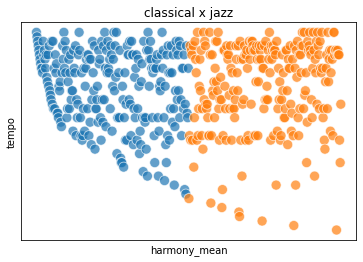

Type y to continue: 8 14


In [6]:
print("features:")
for i in range(len(header)):
    print(str(i)+" - "+header[i])

#Classical x Jazz
do_comparison = 'y'
while(do_comparison == 'y'):
    a, b = map(int, input().split())
    plotData2DGenre(x_test, encoder.inverse_transform(y_test), param1 = a, param2 = b, genre1 = "classical", genre2 = "jazz", header = header)
    do_comparison = input("Type y to continue: ")

12 14


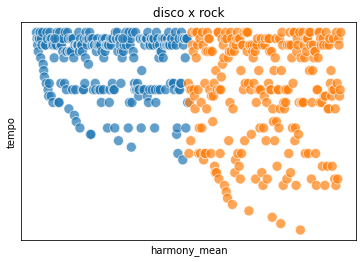

Type y to continue: y
8 14


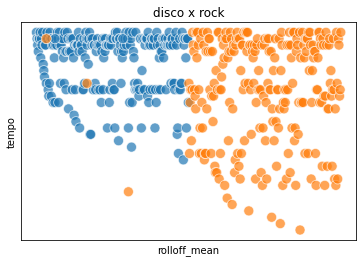

Type y to continue: y
8 10


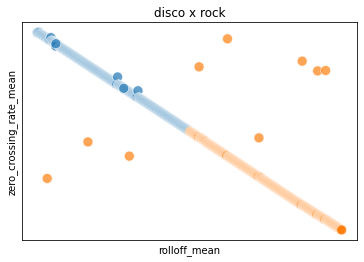

Type y to continue: n


In [7]:
#Disco x Rock
do_comparison = 'y'
while(do_comparison == 'y'):
    a, b = map(int, input().split())
    plotData2DGenre(x_test, encoder.inverse_transform(y_test), param1 = a, param2 = b, genre1 = "disco", genre2 = "rock", header = header)
    do_comparison = input("Type y to continue: ")

## References

[1] N. Ndou, R. Ajoodha and A. Jadhav, "Music Genre Classification: A Review of Deep-Learning and Traditional Machine-Learning Approaches," 2021 IEEE International IOT, Electronics and Mechatronics Conference (IEMTRONICS), Toronto, ON, Canada, 2021, pp. 1-6, doi: 10.1109/IEMTRONICS52119.2021.9422487.